In [278]:
import pandas as pd
from pymongo import MongoClient
import json

file_path = "./troop_movements.csv"
client = MongoClient('mongodb://localhost:27017/')
db = client["project_3"]
collection = db["training_data"]

local_df = pd.read_csv(file_path)

training_data = local_df.to_dict("records")

ifEmpty = list(collection.find())

if not ifEmpty:
    collection.insert_many(training_data)

data = list(collection.find())

df = pd.DataFrame(data)

df = df.drop("_id", axis='columns')

display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 13:30:52,1,at-st,empire,9,9,1,3,Tund
1,2025-07-08 13:30:51,2,resistance_soldier,empire,7,2,10,4,Trandosha
2,2025-07-08 13:30:50,3,unknown,empire,3,8,10,7,Mirial
3,2025-07-08 13:30:49,4,x-wing,empire,5,2,2,2,Corellia
4,2025-07-08 13:30:48,5,stormtrooper,empire,2,8,10,4,Concord Dawn
...,...,...,...,...,...,...,...,...,...
995,2025-07-08 13:14:17,996,tie_silencer,resistance,5,5,6,2,Shili
996,2025-07-08 13:14:16,997,x-wing,resistance,9,4,1,8,Chandrila
997,2025-07-08 13:14:15,998,tie_silencer,empire,2,1,7,5,Cerea
998,2025-07-08 13:14:14,999,at-at,resistance,6,6,4,6,Dathomir


In [279]:

counts_of_empire_vs_resistance = df["empire_or_resistance"].value_counts()

print(counts_of_empire_vs_resistance)


empire_or_resistance
resistance    510
empire        490
Name: count, dtype: int64


In [280]:

counts_of_homeworld = df["homeworld"].value_counts()

print(counts_of_homeworld)


homeworld
Tund            32
Dagobah         32
Champala        32
Muunilinst      29
Toydaria        29
Bestine IV      28
Glee Anselm     28
Cerea           28
Alderaan        28
Sullust         28
Eriadu          28
Stewjon         27
Iridonia        27
Shili           27
Malastare       26
Haruun Kal      26
Trandosha       26
Aleen Minor     25
Iktotch         25
Kalee           25
Naboo           24
Socorro         23
Ojom            23
Quermia         23
Mirial          22
Serenno         22
Zolan           22
Kashyyyk        21
Dorin           21
Concord Dawn    21
Tatooine        20
Mon Cala        20
Corellia        20
Skako           20
Troiken         19
Umbara          19
Rodia           19
Ryloth          18
Dathomir        17
Tholoth         17
Chandrila       17
Vulpter         16
Name: count, dtype: int64


In [281]:
counts_of_unit_type = df["unit_type"].value_counts()

print(counts_of_unit_type)

unit_type
tie_silencer          144
at-at                 136
at-st                 128
x-wing                127
tie_fighter           126
unknown               126
stormtrooper          109
resistance_soldier    104
Name: count, dtype: int64


In [282]:
df["is_resistance"] = df["empire_or_resistance"] == "resistance"

print(display(df))

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 13:30:52,1,at-st,empire,9,9,1,3,Tund,False
1,2025-07-08 13:30:51,2,resistance_soldier,empire,7,2,10,4,Trandosha,False
2,2025-07-08 13:30:50,3,unknown,empire,3,8,10,7,Mirial,False
3,2025-07-08 13:30:49,4,x-wing,empire,5,2,2,2,Corellia,False
4,2025-07-08 13:30:48,5,stormtrooper,empire,2,8,10,4,Concord Dawn,False
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-08 13:14:17,996,tie_silencer,resistance,5,5,6,2,Shili,True
996,2025-07-08 13:14:16,997,x-wing,resistance,9,4,1,8,Chandrila,True
997,2025-07-08 13:14:15,998,tie_silencer,empire,2,1,7,5,Cerea,False
998,2025-07-08 13:14:14,999,at-at,resistance,6,6,4,6,Dathomir,True


None


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_10944\3165255284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = value_counts_df, palette="pastel", x='category', y='count')


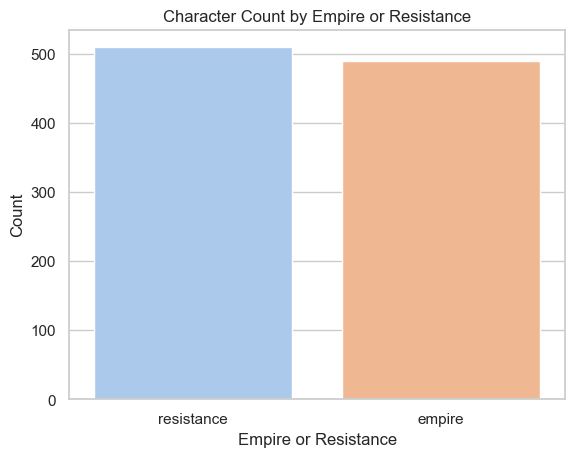

In [283]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

value_counts_df = counts_of_empire_vs_resistance.reset_index()
value_counts_df.columns = ['category', 'count']

sns.barplot(data = value_counts_df, palette="pastel", x='category', y='count')

plt.title("Character Count by Empire or Resistance")
plt.xlabel("Empire or Resistance")
plt.ylabel("Count")
plt.show()

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

training_data = df[["homeworld", "unit_type", "is_resistance"]]

X_encoded = pd.get_dummies(training_data[["homeworld", "unit_type"]],dtype="int")

# print(training_data)
X = X_encoded
y = training_data["is_resistance"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)

clf = DecisionTreeClassifier(random_state=1)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.68


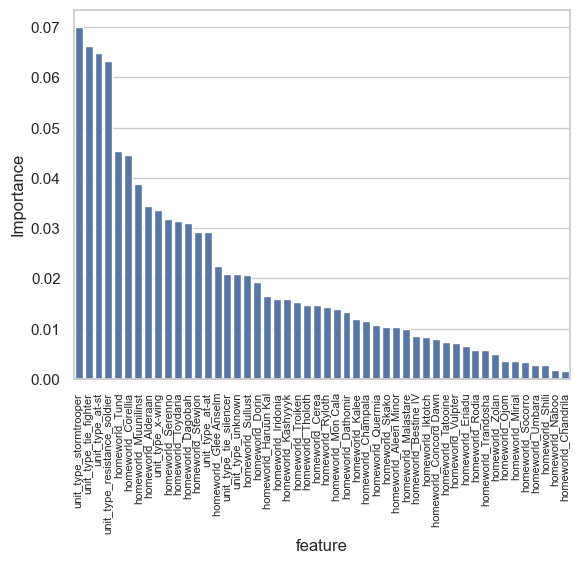

In [285]:
importances = clf.feature_importances_ 

feature_importance = pd.DataFrame({"feature": X_encoded.columns, "Importance": importances})

sorted_featured_importance = feature_importance.sort_values("Importance", ascending=False)

sns.barplot(data=sorted_featured_importance, x="feature", y="Importance")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90, fontsize=8)
plt.show()



In [286]:
import pickle

model_filename = "this_is_not_a_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

In [287]:

import pandas as pd
from pymongo import MongoClient
import json

client = MongoClient('mongodb://localhost:27017/')
db = client["project_3"]
collection = db["real_data"]
real_data_path = "troop_movements_1m.csv"

data = list(collection.find())

if not data:
    local_real_data = pd.read_csv(real_data_path)

    local_real_data_dict = local_real_data.to_dict("records")

    collection.insert_many(local_real_data_dict)

real_data = pd.DataFrame(data)

real_data = real_data.drop("_id", axis='columns')

display(real_data)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako
...,...,...,...,...,...,...,...,...
999995,2023-05-03 18:48:56,3553240,tie_fighter,8.0,4.0,8,1,Chandrila
999996,2023-05-25 13:45:35,1662636,at-at,0.0,3.0,8,6,Trandosha
999997,2023-05-17 12:16:37,2362262,tie_fighter,6.0,8.0,7,9,Kashyyyk
999998,2023-03-17 08:04:26,7669749,tie_fighter,9.0,3.0,3,5,Zolan


In [288]:
real_data["unit_type"] = real_data["unit_type"].replace('invalid_unit', "unknown")

display(real_data['unit_type'].value_counts())

unit_type
tie_silencer          143216
tie_fighter           142753
at-at                 142724
resistance_soldier    142647
stormtrooper          142611
at-st                 142554
x-wing                142494
unknown                 1001
Name: count, dtype: int64

In [289]:
null_mask = real_data.isnull().any(axis=1)
null_rows = real_data[null_mask]

display(null_rows)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
11449,2023-03-18 14:25:02,7560000,unknown,NaN,NaN,5,9,Malastare
26809,2023-03-04 23:00:11,8740000,unknown,NaN,NaN,9,3,Umbara
80378,2023-05-04 04:00:38,3520000,unknown,NaN,NaN,2,4,Chandrila
81841,2023-04-08 13:53:05,5740000,unknown,NaN,NaN,4,1,Tholoth
88647,2023-04-16 09:59:46,5060000,unknown,NaN,NaN,3,7,Mon Cala
100396,2023-05-03 00:20:48,3620000,unknown,NaN,NaN,9,9,Iktotch
127908,2023-03-04 17:28:12,8760000,unknown,NaN,NaN,3,0,Vulpter
140393,2023-06-11 04:42:09,220000,unknown,NaN,NaN,7,5,Sullust
142154,2023-03-20 10:40:24,7400000,unknown,NaN,NaN,4,0,Toydaria
146942,2023-05-29 12:29:43,1320000,unknown,NaN,NaN,0,6,Iktotch


In [290]:
real_data[["location_x", "location_y"]] = real_data[["location_x", "location_y"]].ffill()


null_mask = real_data.isnull().any(axis=1)
null_rows = real_data[null_mask]

display(null_rows)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld


In [291]:
real_data_filename = "troop_movements_1m.parquet"

real_data.to_parquet("troop_movements_1m.parquet")


In [292]:
import pickle
import pandas as pd

model_filename = "./this_is_not_a_model.pkl"
real_data_filename = "./troop_movements_1m.parquet"

with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

loaded_data = pd.read_parquet(real_data_filename)

testing_data = loaded_data[["homeworld", "unit_type"]]

testing_data_encoded = pd.get_dummies(testing_data[["homeworld", "unit_type"]], dtype="int")

predictions = loaded_model.predict(testing_data_encoded)

print(predictions)

loaded_data['predictions'] = predictions

display(loaded_data)

[False False False ...  True False  True]


,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor,False
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare,False
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno,False
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund,False
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako,False
...,...,...,...,...,...,...,...,...,...
999995,2023-05-03 18:48:56,3553240,tie_fighter,8.0,4.0,8,1,Chandrila,False
999996,2023-05-25 13:45:35,1662636,at-at,0.0,3.0,8,6,Trandosha,False
999997,2023-05-17 12:16:37,2362262,tie_fighter,6.0,8.0,7,9,Kashyyyk,True
999998,2023-03-17 08:04:26,7669749,tie_fighter,9.0,3.0,3,5,Zolan,False
